# Simba spectrum fitting with VAMP

Here we test VAMP on a synthetic spectrum of a massive central galaxy in the s43 Simba simulation. We generated the spectra using [Pygad](https://bitbucket.org/broett/pygad/src/master/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from vpfits import VPfit
from vpregion import VPregion
from vpspectrum import VPspectrum

from physics import *

import h5py

import corner

## Carbon Spectrum

First we will fit a metal spectrum. Load in the dataset and extract the data:

In [18]:
carbon_line = 1036. # in angstroms
carbon_datafile = 'data/simba_CII1036.h5'
vamp_c = VPspectrum(carbon_line, carbon_datafile, voigt=False,)

VPspectrum has loaded the data automatically from the input file:

In [20]:
carbon_wavelength = vamp_c.wavelength_array
print(carbon_wavelength)

[1036.34564212 1036.36292636 1036.3802106  1036.39749484 1036.41477908
 1036.43206332 1036.44934756 1036.46663181 1036.48391605 1036.50120029
 1036.51848453 1036.53576877 1036.55305301 1036.57033725 1036.58762149
 1036.60490573 1036.62218997 1036.63947421 1036.65675845 1036.67404269
 1036.69132693 1036.70861117 1036.72589542 1036.74317966 1036.7604639
 1036.77774814 1036.79503238 1036.81231662 1036.82960086 1036.8468851
 1036.86416934 1036.88145358 1036.89873782 1036.91602206 1036.9333063
 1036.95059054 1036.96787479 1036.98515903 1037.00244327 1037.01972751
 1037.03701175 1037.05429599 1037.07158023 1037.08886447 1037.10614871
 1037.12343295 1037.14071719 1037.15800143 1037.17528567 1037.19256991
 1037.20985415 1037.2271384  1037.24442264 1037.26170688 1037.27899112
 1037.29627536 1037.3135596  1037.33084384 1037.34812808 1037.36541232
 1037.38269656 1037.3999808  1037.41726504 1037.43454928 1037.45183352
 1037.46911776 1037.48640201 1037.50368625 1037.52097049 1037.53825473
 1037.555

### Region Detection

Next we find the regions in the spectrum that have absorption features to fit. The `min_region_width` argument sets the minimum width of a region in pixels. The output is the `region_pixels` and `region_waves` properties, which are the boundaries of the absorption regions. 

In [25]:
min_region_width = 2
vamp_c.compute_detection_regions(min_region_width=2)
print('Absorption regions detected: ' + str(vamp_c.region_waves))

Computing detection regions...
Found 4 detection regions.
Absorption regions detected: [[1048.0470730649474, 1048.6865899703391], [1048.790295414457, 1049.5680862453387], [1049.7236444115154, 1050.017476503182], [1052.4545544399455, 1052.85209197573]]


We can plot the spectrum to see the regions we've identified:

In [23]:
def plot_bracket(x, axis, dir):
    height = .2
    arm_length = 0.2
    axis.plot((x, x), (1-height/2, 1+height/2), color='magenta')

    if dir=='left':
        xarm = x+arm_length
    if dir=='right':
        xarm = x-arm_length

    axis.plot((x, xarm), (1-height/2, 1-height/2), color='magenta')
    axis.plot((x, xarm), (1+height/2, 1+height/2), color='magenta')

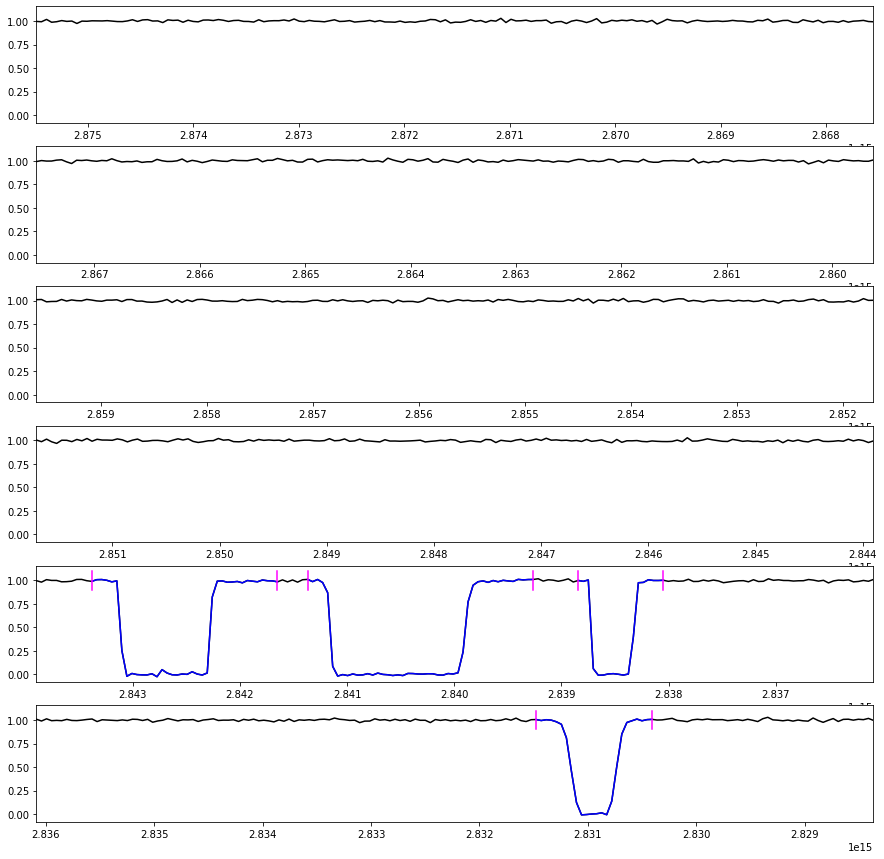

In [27]:
N = 6
fig, ax = plt.subplots(N, figsize=(15,15))

length = len(vamp_c.flux_array) / N

for n in range(N):
    
    lower_lim = int(n*length)
    upper_lim = int(n*length+length)
    
    ax[n].plot(vamp_c.frequency_array, vamp_c.flux_array, c='black')
    
    ax[n].set_xlim(vamp_c.frequency_array[lower_lim], vamp_c.frequency_array[upper_lim])

    for (start, end) in vamp_c.region_pixels:
        ax[n].plot(vamp_c.frequency_array[start:end+1], vamp_c.flux_array[start:end+1], color='blue')
        plot_bracket(vamp_c.frequency_array[start], ax[n], 'left')
        plot_bracket(vamp_c.frequency_array[end], ax[n], 'right')

plt.show()

### Fitting

Now we will fit each region individually. For each region, we define a `VPregion` object. 

VAMP makes an initial guess as to the number of components `n` in each region. It then does a Bayesian MCMC fit of a Gaussian or Voigt profile using the initial guess and sees how well it matches the data. The fit is tested against the data by calculating the Bayesian Information Criterion (BIC) and the Chi-squared of the fit. VAMP will then find the optimal number of components by increasing the number of profiles iteratively and looking at the BIC and the Chi-squared of the fit.

Fitting the spectrum gives us an amplitude, width and position for each of the profiles in the region, which can be used to find the optical depth, Doppler b parameter and equivalent width of each profile.

A length of 3000 iterations is enough to get a good fit to the data, but here we exaggerate it and do 5000 iterations so that we can see the contours in the parameter 2d histograms properly.

Initial number of components: 1
Degrees of freedom:34
Setting initial number of lines to: 1
Old BIC value of -34.29 is greater than the current -56.00.
Increasing the number of lines to: 3
Old BIC value of -56.00 is greater than the current -104.15.
Increasing the number of lines to: 4
Old BIC value of -104.15 is greater than the current -156.39.
Increasing the number of lines to: 5
Old BIC value of -156.39 is greater than the current -156.81.
Increasing the number of lines to: 6
BIC increased with increasing the line number, stopping.
Final n=5.
Updated number of components:5


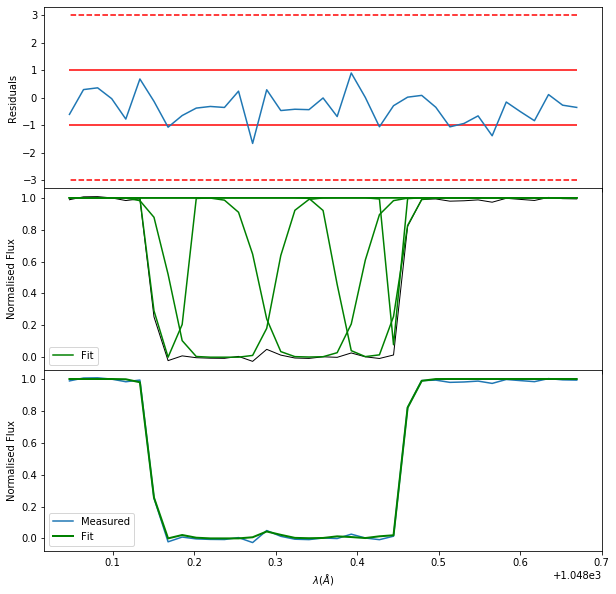

Initial number of components: 1
Degrees of freedom:42
Setting initial number of lines to: 1
Old BIC value of -43.64 is greater than the current -79.36.
Increasing the number of lines to: 3
Old BIC value of -79.36 is greater than the current -224.59.
Increasing the number of lines to: 4
Old BIC value of -224.59 is greater than the current -238.68.
Reduced Chi squared is less than 1.5
Final n=4
Updated number of components:4


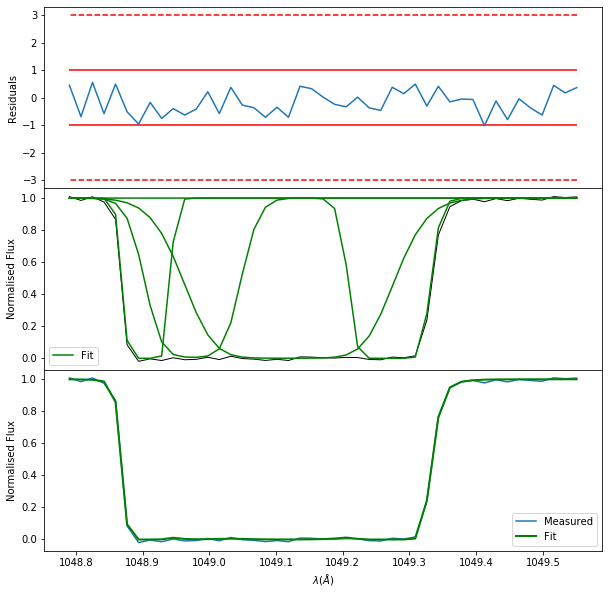

Initial number of components: 1
Degrees of freedom:14
Setting initial number of lines to: 1
Old BIC value of -13.30 is greater than the current -42.80.
Increasing the number of lines to: 3
Old BIC value of -42.80 is greater than the current -68.97.
Increasing the number of lines to: 4
BIC increased with increasing the line number, stopping.
Final n=3.
Updated number of components:3


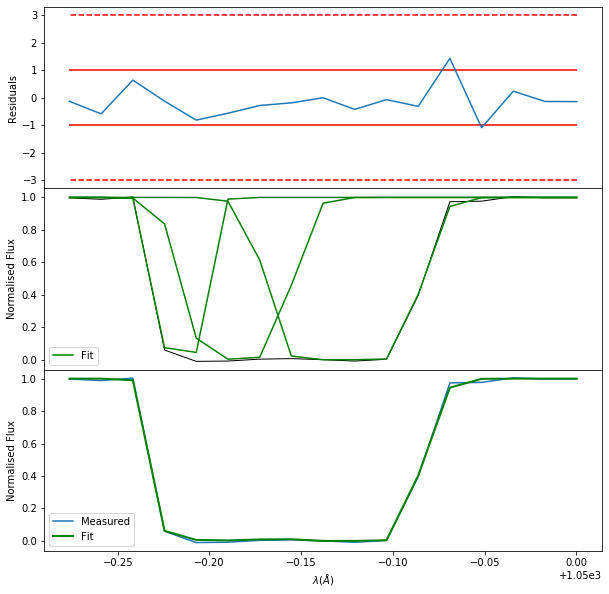

Initial number of components: 1
Degrees of freedom:20
Setting initial number of lines to: 1
BIC increased with increasing the line number, stopping.
Final n=1.
Updated number of components:1


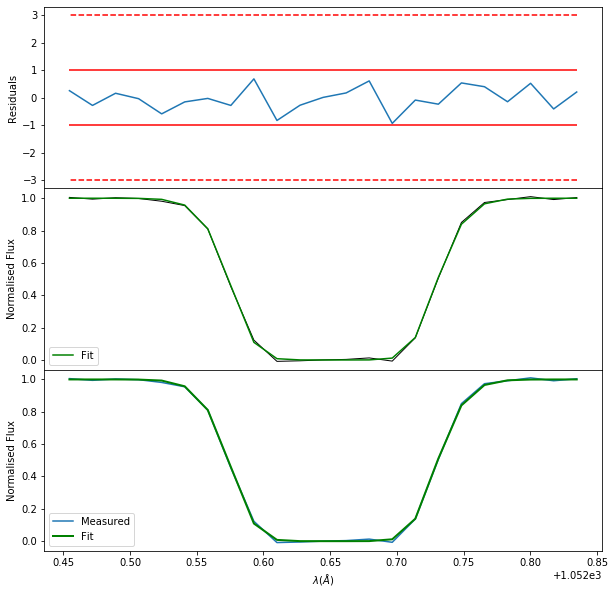

In [35]:
for start, end in vamp_c.region_pixels:
    waves = np.flip(vamp_c.wavelength_array[start:end], 0)
    fluxes = np.flip(vamp_c.flux_array[start:end], 0)
    nus = np.flip(vamp_c.frequency_array[start:end], 0)
    noise = np.flip(vamp_c.noise_array[start:end], 0)
    
    region = VPregion(nus, fluxes, noise, voigt=False)

    print('Initial number of components: '+ str(region.n))
    print('Degrees of freedom:' + str(region.freedom))
    region.region_fit(iterations=5000)
    region.n = len(region.fit.estimated_profiles)
    print('Updated number of components:' + str(region.n))
    region.fit.plot(waves, fluxes, n=region.n, start_pix=start, end_pix=end)
    

In [36]:
#The fit for each region is stored:

carbon_fit = region.fit
print(carbon_fit)

We can look at the properties of the MCMC chains and see if we have sensible distributions for the parameters:

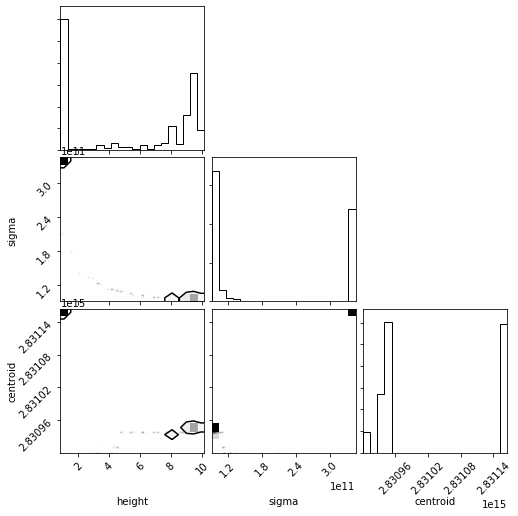

In [37]:
height = carbon_fit.mcmc.trace(carbon_fit.estimated_variables[0]['amplitude'])[:]
sigma = carbon_fit.mcmc.trace(carbon_fit.estimated_variables[0]['sigma'])[:]
centroid = carbon_fit.mcmc.trace(carbon_fit.estimated_variables[0]['centroid'])[:]

samples = np.transpose(np.array([height, sigma, centroid]))

fig = corner.corner(samples, labels=['height', 'sigma', 'centroid'])

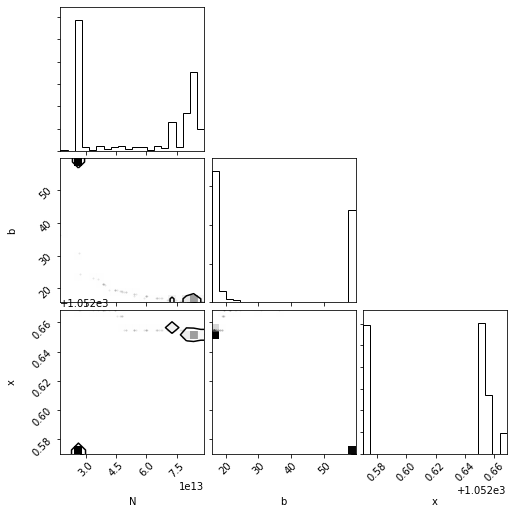

In [38]:
carbon_b = DopplerParameter(sigma, carbon_line)
carbon_N = ColumnDensity(height, sigma)

l_centroid = Freq2wave(centroid)

phys_samples = np.transpose(np.array([carbon_N, carbon_b, l_centroid]))
fig = corner.corner(phys_samples, labels=['N', 'b', 'x'])

## Hydrogen Spectrum

Now we will fit a Hydrogen spectrum, which requires a Voigt profile instead of a Gaussian. The extra parameter in the Voigt profile means this is much slower. We switch to fitting Voigt profiles using the `voigt=True` in the initialisation of `VPregion`.

In general, the Gaussian fit is much faster (the extra parameter makes a huge difference!) so whenever possible it's better to just use a Gaussian.

In [40]:
hydro_line = 1215.
hydro_datafile = 'data/simba_H1215.h5'
vamp_h = VPspectrum(hydro_line, hydro_datafile, voigt=True, )

In [41]:
# Identify regions in the spectrum to fit

min_region_width = 2
vamp_h.compute_detection_regions(min_region_width=min_region_width)

Computing detection regions...
Found 3 detection regions.


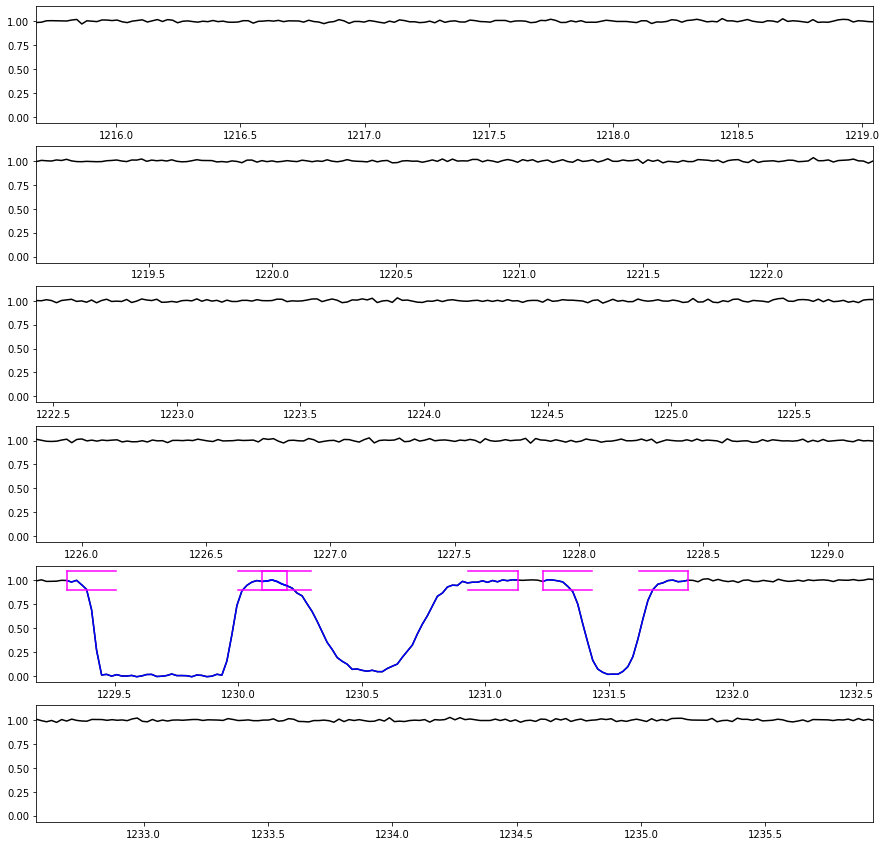

In [42]:
N = 6
fig, ax = plt.subplots(N, figsize=(15,15))

length = len(vamp_h.flux_array) / N

for n in range(N):
    
    lower_lim = int(n*length)
    upper_lim = int(n*length+length)
    
    ax[n].plot(vamp_h.wavelength_array, vamp_h.flux_array, c='black')
    
    ax[n].set_xlim(vamp_h.wavelength_array[lower_lim], vamp_h.wavelength_array[upper_lim])

    for (start, end) in vamp_h.region_pixels:
        ax[n].plot(vamp_h.wavelength_array[start:end+1], vamp_h.flux_array[start:end+1], color='blue')
        plot_bracket(vamp_h.wavelength_array[start], ax[n], 'left')
        plot_bracket(vamp_h.wavelength_array[end], ax[n], 'right')

plt.show()

Initial number of components: 1
Degrees of freedom:41
Setting initial number of lines to: 1
Old BIC value of -0.79 is greater than the current -12.28.
Increasing the number of lines to: 3
BIC increased with increasing the line number, stopping.
Final n=2.
Updated number of components:2


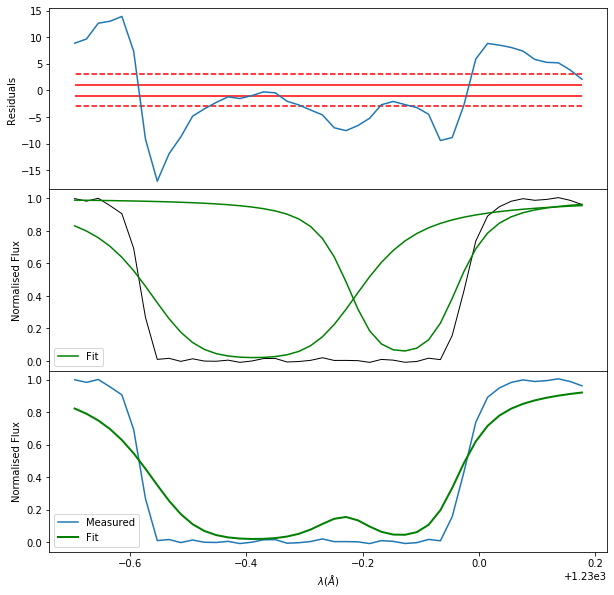

Initial number of components: 1
Degrees of freedom:48
Setting initial number of lines to: 1
BIC increased with increasing the line number, stopping.
Final n=1.
Updated number of components:1


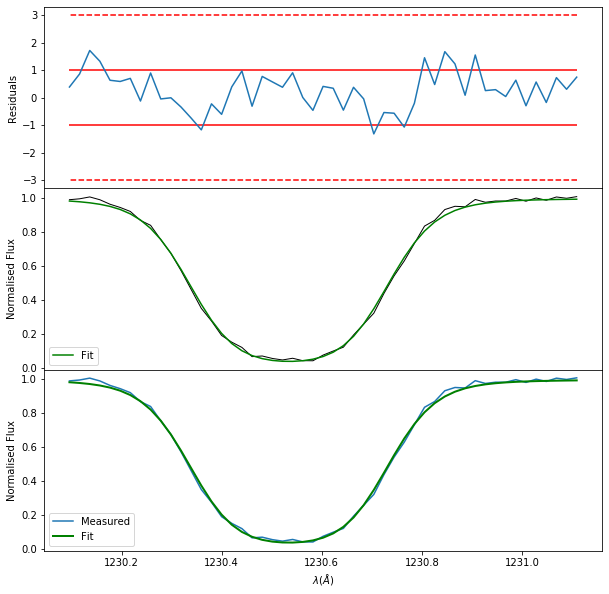

Initial number of components: 1
Degrees of freedom:26
Setting initial number of lines to: 1
BIC increased with increasing the line number, stopping.
Final n=1.
Updated number of components:1


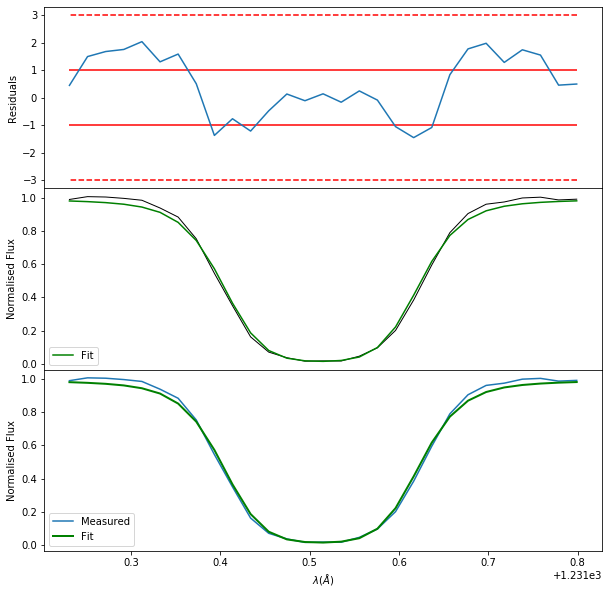

In [44]:
for start, end in vamp_h.region_pixels:
    waves = np.flip(vamp_h.wavelength_array[start:end], 0)
    fluxes = np.flip(vamp_h.flux_array[start:end], 0)
    nus = np.flip(vamp_h.frequency_array[start:end], 0)
    noise = np.flip(vamp_h.noise_array[start:end], 0)
    
    region = VPregion(nus, fluxes, noise, voigt=True)

    print('Initial number of components: '+ str(region.n))
    print('Degrees of freedom:' + str(region.freedom))
    region.region_fit()
    region.n = len(region.fit.estimated_profiles)
    print('Updated number of components:' + str(region.n))
    region.fit.plot(waves, fluxes, n=region.n, start_pix=start, end_pix=end)
    

It's clear from the plots that a Voigt profile is not a good choice for saturated lines, where the sides of the profile are steep.